In [38]:
#import required libraries
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:

# read the dataset and see how much data is there
titanic_df = pd.read_csv('datasets/titanic/train.csv')
titanic_df.shape

(891, 12)

In [40]:
#show first few entries to get a quick look at the data
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [41]:
# Drop irellevant columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1,inplace=True)
titanic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [42]:
# show how much Fields in each Column dont have a value
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [43]:
# drop data where there are null values (every line where at least one null is there)
titanic_df = titanic_df.dropna()

In [44]:
# see how much data is left after droping data with null
titanic_df.shape

(712, 8)

In [45]:
# check if no empy fields left
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [46]:
# show quick statistical overview
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

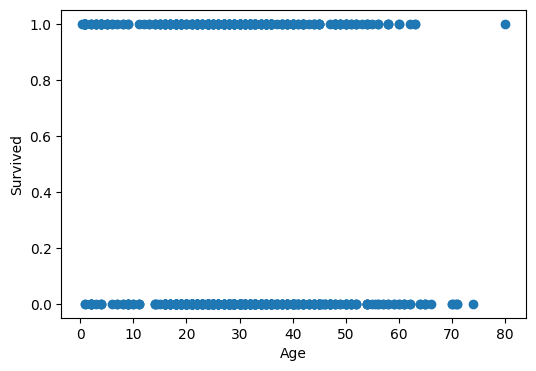

In [47]:
fig, ax = plt.subplots(figsize=(6,4))

plt.scatter(titanic_df['Age'],titanic_df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

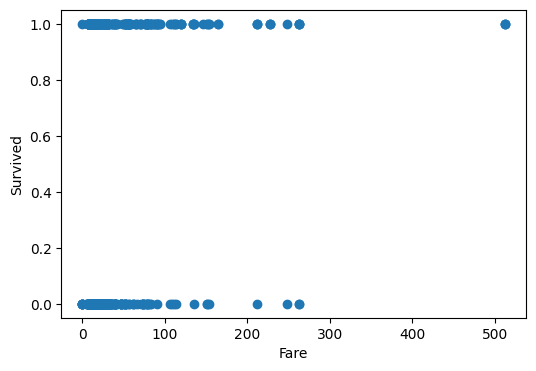

In [48]:
fig, ax = plt.subplots(figsize=(6,4))

plt.scatter(titanic_df['Fare'],titanic_df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

In [49]:
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [50]:
pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [51]:
# titanic_df['Sex']=titanic_df['Sex'].astype('category').cat.codes
# titanic_df['Embarked']=titanic_df['Embarked'].astype('category').cat.codes

In [52]:
titanic_data_corr = titanic_df.corr(numeric_only=True)

titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<Axes: >

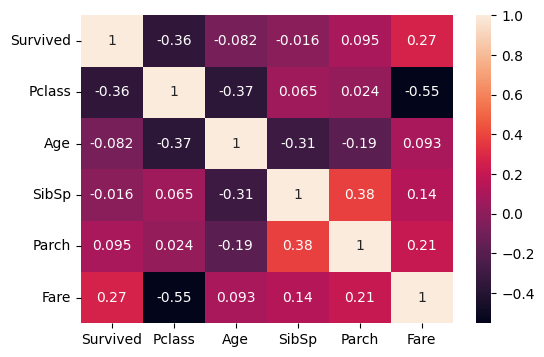

In [53]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(titanic_data_corr, annot=True)

In [54]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [55]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [56]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])

titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


In [57]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,1,0,24.0,0,0,69.300,True,False,False
1,0,3,0,30.5,0,0,7.750,False,True,False
2,1,2,1,32.0,1,0,26.000,False,False,True
3,0,2,1,51.0,0,0,12.525,False,False,True
4,0,3,1,24.5,0,0,8.050,False,False,True


In [59]:
titanic_df.to_csv('datasets/titanic/processed/train_processed.csv', index=False)

housing.csv titanic
